# Assigment 4
# Determining and removing drawbacks of exponential and running mean
# Task 2

## Team 6: Berman Vladimir, Dronova Maria, Bazhenov Artem, Skoltech, October, 2022

### Initialisation of libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format='retina'

### Setting functions

#### Setting the function for forward exponential smoothing

In [2]:
def mean_smooth(arr):
    dub = np.array(arr)
    for i in range(6, len(dub) - 6):
        k = i
        dub[i] = 1 / 24 * dub[i-6] + 1 / 12 * (dub[i-5] + dub[i-4] + dub[i-3] + dub[i-2] + dub[i-1] + dub[i] + dub[i+1] + dub[i+2] + dub[i+3] + dub[i+4] + dub[i+5]) + 1 / 24 * dub[i+6]
    return dub

#### Setting the function for forward exponential smoothing

In [3]:
def exp_smooth(alp, arr):
    dub = np.array(arr)
    for i in range(1, len(arr)):
        dub[i] = dub[i - 1] + alp * (dub[i] - dub[i - 1])
    return dub

#### Setting the function for backward exponential smoothing

In [4]:
def backward_exp_smooth(alp, arr):
    dub = np.array(arr)
    for i in range(len(arr) - 2, -1, -1):
        dub[i] = dub[i + 1] + alp * (dub[i] - dub[i + 1])
    return dub

#### Setting the function for deviation idicator

In [5]:
def deviation_indicator(arrz, arrx):
    return sum(np.square(arrz - arrx))

#### Setting the function for variability idicator

In [6]:
def variability_indicator(arr):
    summ = 0
    for i in range(len(arr) - 2):
        summ = summ + (arr[i + 2] - 2 * arr[i + 1] + arr[i]) ** 2
    return summ

# PART 1. Comparison of the traditional 13-month running mean with the forward-backward exponential smoothing for approximation of 11-year sunspot cycle 

#### Setting path and opening file 

In [7]:
path = 'C:\\papka s filami\\'
f = open(path + 'data_group6.txt', 'r')
lines = f.readlines()

#### Reading from file

In [8]:
result = []
data = np.zeros([len(lines), 3])
for i in range(len(lines)):
    lines[i] = lines[i].replace('\n', '')
    result.append(lines[i].split())
for i in range(len(result)):
    for j in range(3):
        data[i][j] = float(result[i][j])

#### Setting size for residuals

In [9]:
v = np.zeros(len(data))
ro = np.zeros(len(data))

for i in range(1,len(data)):
    v[i] = data[i , 0] - data[i - 1, 0]
for i in range(2,len(data)):
    ro[i] = data[i, 0] - data[i - 2, 0]

#### Calculating window size and smoothing constant

In [10]:
Ev = np.std(v[1:len(v) - 1]) ** 2
Ero = np.std(ro[2:len(ro) - 1]) ** 2
E = np.array([Ev, Ero])
coefs = (np.array([[1, 2], [2, 2]]))
sigma_2 = np.dot(np.linalg.inv(coefs), E)
hi = sigma_2[1] / sigma_2[0]
alp = (-hi + np.sqrt(hi ** 2 + 4 * hi)) / 2
M = 13

#### Plotting graph for comparison of running mean and backward exponential smoothing of monthly mean sunspot number

Text(0.5, 1.0, 'Graph 1\nComparison of running mean and forward-backward exponential smoothing')

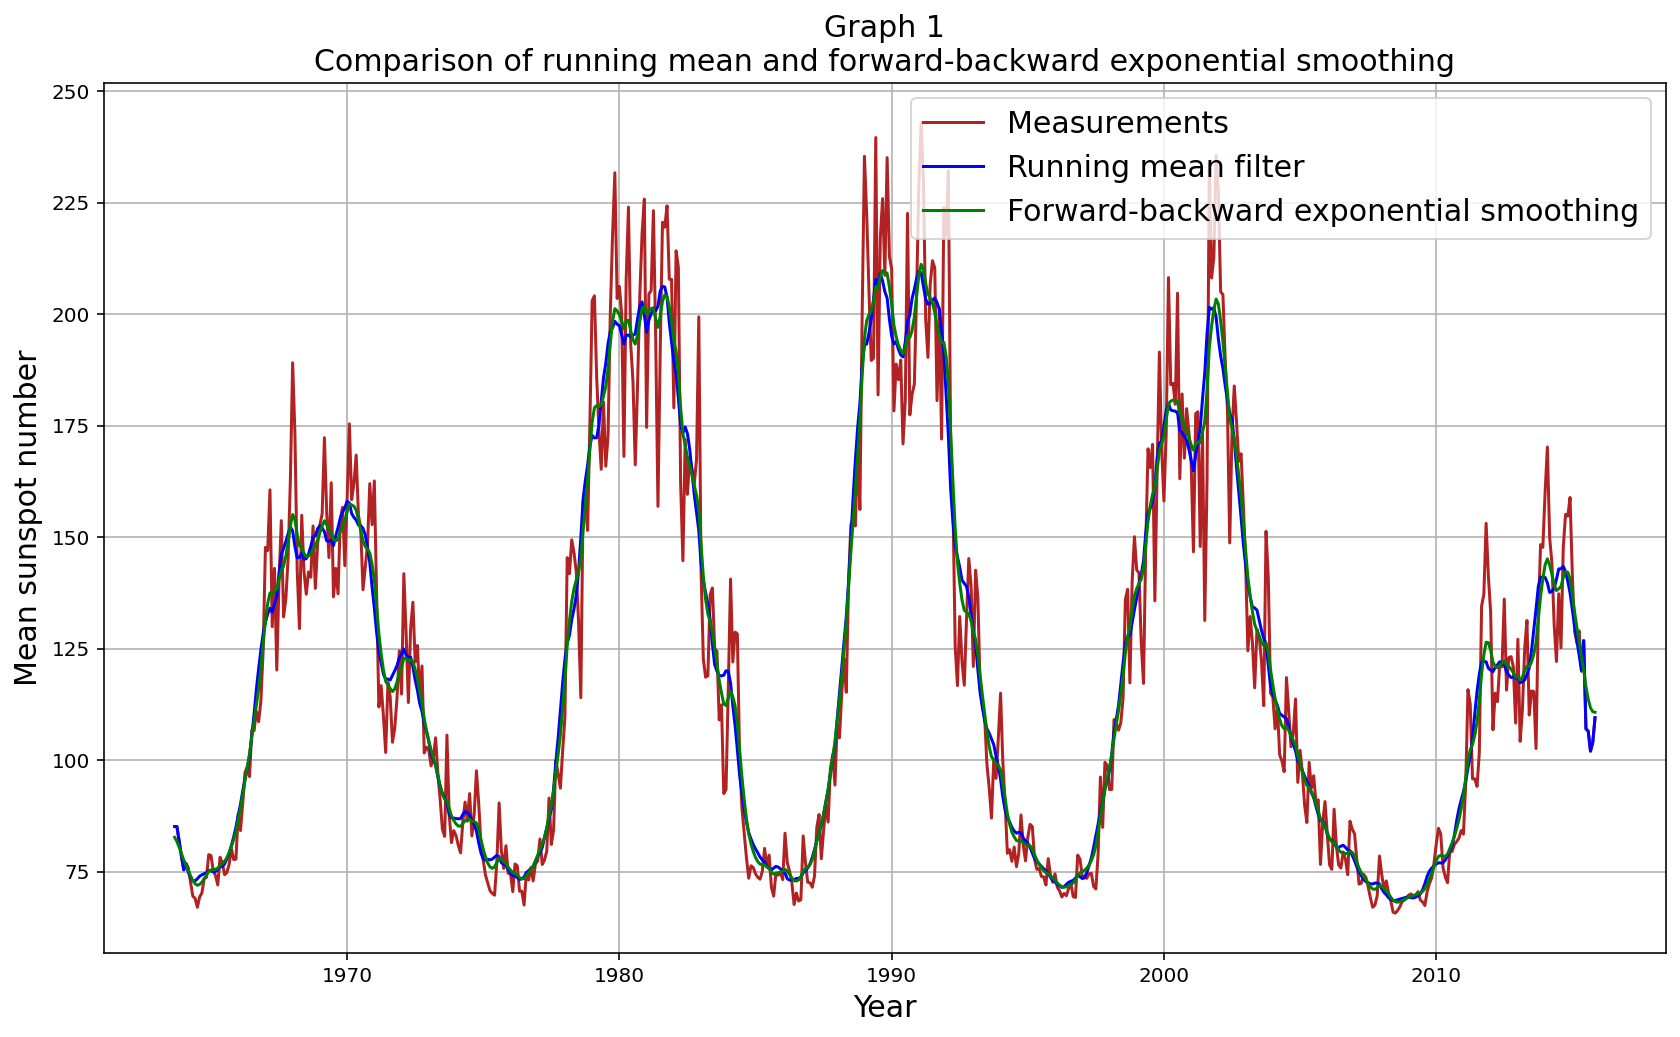

In [12]:
plt.figure(figsize=(14,8))
plt.plot(data[:,0] + (data[:,1] - 1) / 12, data[:,2], color = 'firebrick')
plt.plot(data[:,0] + (data[:,1] - 1) / 12, mean_smooth(data[:,2]), color = 'b')
plt.plot(data[:,0] + (data[:,1] - 1) / 12, backward_exp_smooth(alp, exp_smooth(alp, data[:,2])), color = 'g')
plt.grid()
plt.ylabel('Mean sunspot number',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.legend(['Measurements', 'Running mean filter', 'Forward-backward exponential smoothing'],fontsize=15)
plt.title('Graph 1\nComparison of running mean and forward-backward exponential smoothing',fontsize=15)

In [13]:
print('Deviation indicator for backward exponential smoothing =', deviation_indicator(data[:,2], 
                                                            backward_exp_smooth(alp, exp_smooth(alp, data[:,2]))))
print('Deviation indicator for running mean =',deviation_indicator(data[:,2], mean_smooth(data[:,2])))

Deviation indicator for backward exponential smoothing = 76104.79780134012
Deviation indicator for running mean = 95051.9816593196


In [14]:
print('Variability indicator for backward exponential smoothing =',variability_indicator(backward_exp_smooth(alp,
                                                                                            exp_smooth(alp, data[:,2]))))
print('Variability indicator for running mean =',variability_indicator(mean_smooth(data[:,2])))

Variability indicator for backward exponential smoothing = 906.4213584709893
Variability indicator for running mean = 2531.301614038511


### Variability indicator for backward exponential smoothing is smaller then for running mean, which indicates that we have more smooth data. Deviation indicator for backward exponential smoothing is smaller then for running mean, which in general is good, because it means that our smoothing is rather close to the trajectory. Therefore, according to deviation and variability indicators, we got smoothing constant that provides better results compared to 13-month running mean. Calculation of smoothing constant is made with formula utilizing variable hi. 

# PART 2. 3D surface filtration using forward-backward smoothing 

#### Opening files 

In [15]:
f1 = open(path + "true_surface.txt", 'r')
lines1 = f1.readlines()
result1 = []

f2 = open(path + "noisy_surface.txt", 'r')
lines2 = f2.readlines()
result2 = []

#### Generating true and noisy surface

In [16]:
true_surf = np.zeros([len(lines1), len(lines1)])
for i in range(len(lines1)):
    lines1[i] = lines1[i].replace('\n', '')
    result1.append(lines1[i].split())
for i in range(len(lines1)):
    for j in range(len(lines1)):
        true_surf[i][j] = float(result1[i][j])
        
noise_surf = np.zeros([len(lines2), len(lines2)])
for i in range(len(lines2)):
    lines2[i] = lines2[i].replace('\n', '')
    result2.append(lines2[i].split())
for i in range(len(lines2)):
    for j in range(len(lines2)):
        noise_surf[i][j] = float(result2[i][j])

#### Setting array for plotting

In [17]:
x = np.arange(0, 51, 1)
y = np.arange(0, 51, 1)
x, y = np.meshgrid(x, y)

#### Plotting graph of surfaces

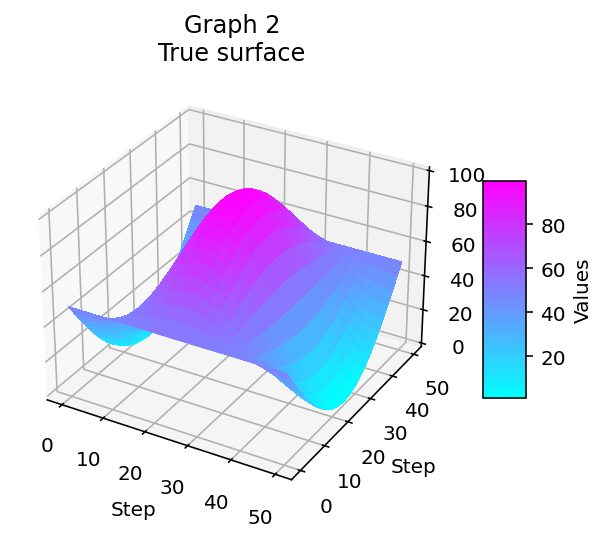

In [18]:
fig2, ax2 = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax2.plot_surface(x, y, true_surf, cmap=cm.cool, linewidth=0, antialiased=False)
fig2.colorbar(surf, shrink=0.5, aspect=5, label='Values')
ax2.set_xlabel('Step')
ax2.set_ylabel('Step')
ax2.set_title('Graph 2\nTrue surface')
plt.show()

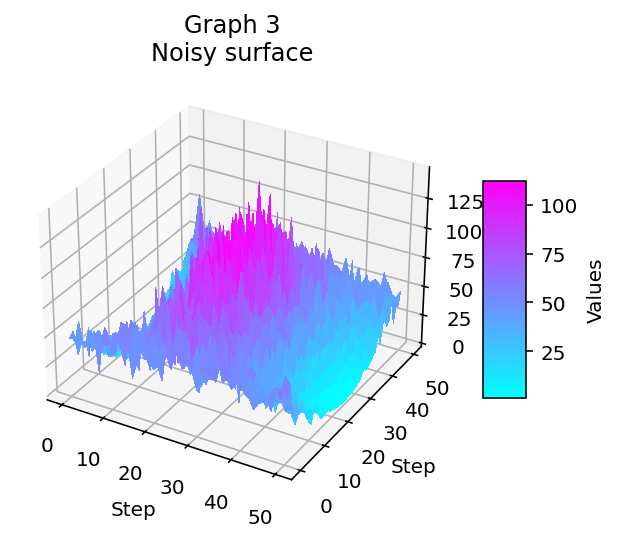

In [19]:
fig3, ax3 = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax3.plot_surface(x, y, noise_surf, cmap=cm.cool, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig3.colorbar(surf, shrink=0.5, aspect=5, label='Values')
ax3.set_xlabel('Step')
ax3.set_ylabel('Step')
ax3.set_title('Graph 3\nNoisy surface')
plt.show()

#### Determining the variance of deviation of noisy surface from the true one

In [20]:
var1 = np.var(true_surf.reshape(1, 2601) - noise_surf.reshape(1, 2601)) 
print(var1)

122.00785069107144


#### Сreating smoothed surface

In [21]:
noise_surf_exp_rows = []
noise_surf_exp = []
alp = 0.335
 # smoothing rows
for i in range(len(noise_surf)):
    noise_surf_exp_rows.append(backward_exp_smooth(alp, exp_smooth(alp, noise_surf[i])))
 # smoothing columns 
for i in range(len(noise_surf)):
    noise_surf_exp.append(np.flip(backward_exp_smooth(alp, (exp_smooth(alp,
                                                                    np.flip([row[i] for row in noise_surf_exp_rows]))))))
noise_surf_exp = np.transpose(noise_surf_exp)

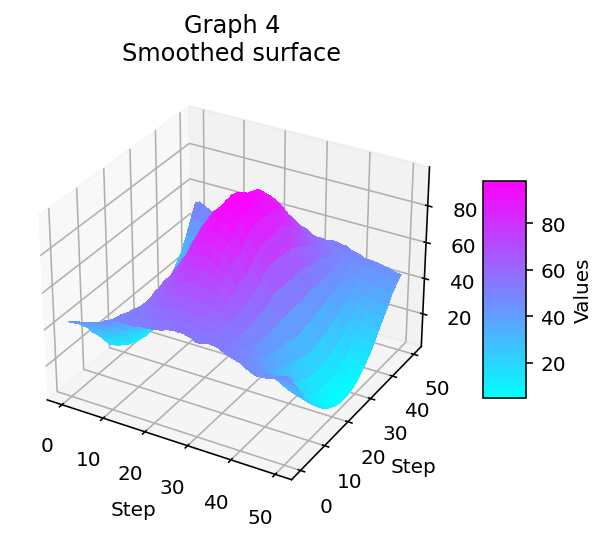

In [22]:
fig4, ax4 = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax4.plot_surface(x, y, np.array(noise_surf_exp), cmap=cm.cool, linewidth=0, antialiased=False)
fig4.colorbar(surf, shrink=0.5, aspect=5, label='Values')
ax4.set_xlabel('Step')
ax4.set_ylabel('Step')
ax4.set_title('Graph 4\nSmoothed surface')
plt.show()

#### Determining the variance of deviation of smoothed surface from the true one

In [23]:
var2 = np.std(true_surf.reshape(1, 2601) - noise_surf_exp.reshape(1, 2601)) ** 2
print(var2)

6.688506047884893


#### Comparison of variances 

In [24]:
delta = var1 - var2
print(delta)

115.31934464318655


### As far as we can see, comparison of variances shows that backward smoothing of surface works as a great way to get rid of noise.

#### Determining the affect of smoothing constant on estimation results

In [25]:
alp_arr = np.arange(0.05, 1, 0.05)
var = []
for alp in alp_arr:
    noise_surf_exp_rows = []
    noise_surf_exp = []
    for i in range(len(noise_surf)):
        noise_surf_exp_rows.append(backward_exp_smooth(alp, exp_smooth(alp, noise_surf[i])))

    for i in range(len(noise_surf)):
        noise_surf_exp.append(np.flip(backward_exp_smooth(alp, (exp_smooth(alp,
                                                                    np.flip([row[i] for row in noise_surf_exp_rows]))))))
    noise_surf_exp = np.transpose(noise_surf_exp)
    var.append(np.std(true_surf.reshape(1, 2601) - noise_surf_exp.reshape(1, 2601)) ** 2)

#### Plotting dependence

Text(0.5, 1.0, 'Graph 5\nDependence of variance on smoothing constant')

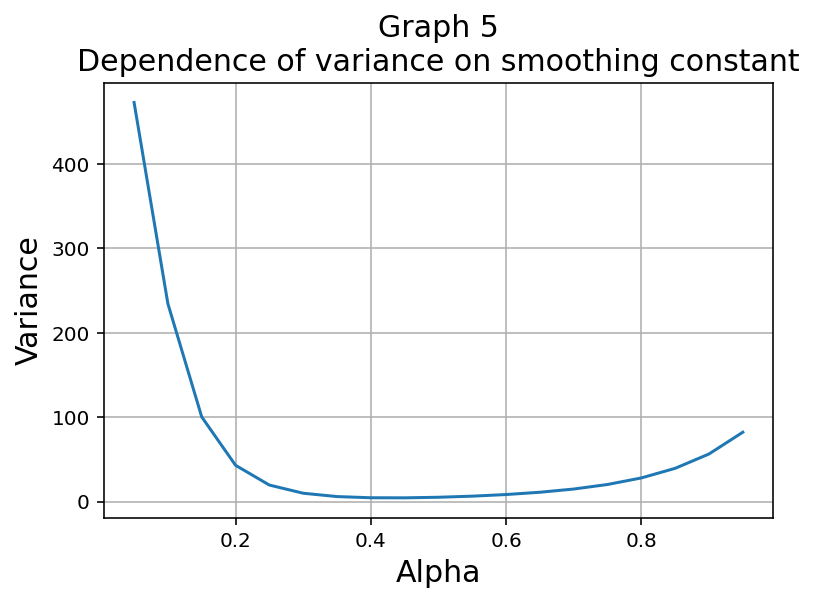

In [26]:
fig5, ax5 = plt.subplots()
plt.plot(alp_arr, var)
plt.grid()
plt.ylabel('Variance',fontsize=15)
plt.xlabel('Alpha',fontsize=15)
plt.title('Graph 5\nDependence of variance on smoothing constant',fontsize=15)

### Graph 5 shows that small aplha (less then 0.3) use is associated with large measurement scatter (i.e., big variance). That is due to excessive smoothing. Optimal range for surfaces that gives lesser variance is from 0.3 to 0.6 alpha. Bigger smoothing constant brings us closer to the initial surface full of noise, therefore variance grows as well. Now let's use alpha = 0.4 from optimal smoothing interval on order to show the best-smoothed surface.

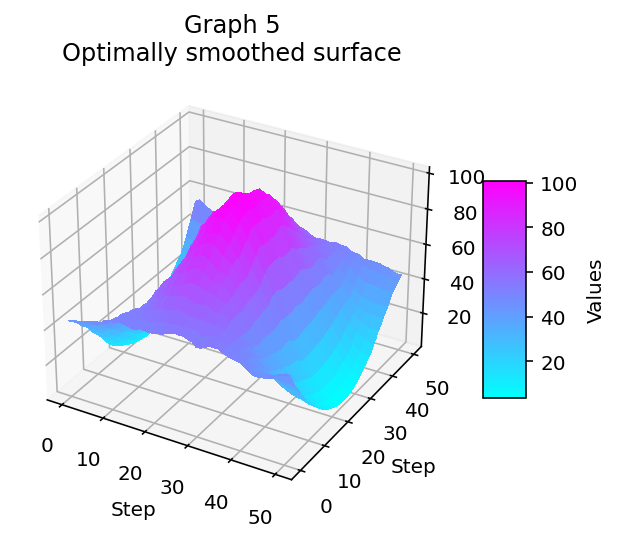

Variance = 4.466941251347372


In [27]:
noise_surf_exp_rows = []
noise_surf_exp = []
alp = 0.4
 # smoothing rows
for i in range(len(noise_surf)):
    noise_surf_exp_rows.append(backward_exp_smooth(alp, exp_smooth(alp, noise_surf[i])))
 # smoothing columns 
for i in range(len(noise_surf)):
    noise_surf_exp.append(np.flip(backward_exp_smooth(alp, (exp_smooth(alp,
                                                                    np.flip([row[i] for row in noise_surf_exp_rows]))))))
noise_surf_exp = np.transpose(noise_surf_exp)
fig5, ax5 = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax5.plot_surface(x, y, np.array(noise_surf_exp), cmap=cm.cool, linewidth=0, antialiased=False)
fig5.colorbar(surf, shrink=0.5, aspect=5, label='Values')
ax5.set_xlabel('Step')
ax5.set_ylabel('Step')
ax5.set_title('Graph 5\nOptimally smoothed surface')
plt.show()
var3 = np.std(true_surf.reshape(1, 2601) - noise_surf_exp.reshape(1, 2601)) ** 2
print('Variance =',var3)

## Learning log
### Initialization of functions as well as part containg comparison of the traditional 13-month running mean with the forward-backward exponential smoothing for approximation sunspot cycle was made by Vladimir Berman. According to deviation and variability indicators, we got smoothing constant that provides better results compared to 13-month running mean. 
### Part with filtrating 3d surface using forward-backward smoothing was carried out by Maria Dronova and Artem Bazhenov. Comparison of variances for noisy and smoothed surface shows that backward smoothing works as a effective way to get rid of noise, reducing value 10 times in awerage. 
### Determination of affect of alpha was carried out by Artem and Vladimir. Optimal range for surfaces that gives smallst variance is 0.3...0.6 alpha. Smaller value over-smoothes surface, bigger one does not filter significant amount of noise. Re-plotted surface with optimal alpha = 0.4 shows the least variance.
### Conclusions were made together after group discussion, then report was made by Maria. 